In [1]:
# 模拟数据获取
from airplane import Airplane
from receiver import Receiver

airplane1 = Airplane('782034',[108.128234,33.2141348,10000],[109.86143245,34.750012,10000],180,0)
receiver1 = Receiver([108.7187911987,34.0290298462,435],dirfting=-500,NoiseRange=(-100,300))
receiver2 = Receiver([108.7135726929,34.0363121033,427],dirfting=500,NoiseRange=(-200,100))

time_track1 =receiver1.fin_time_track(airplane1)
time_track2 =receiver2.fin_time_track(airplane1)

track1 = airplane1.track

In [3]:
print(time_track1[:10])

[0.00035436880465765033, 0.5899318346512754, 1.1591499441677713, 1.686709167717615, 2.1512299386812357, 2.6858161311511823, 3.182109287988064, 3.6011683620325305, 4.1735452244633855, 4.679625891098698]


2735 2735


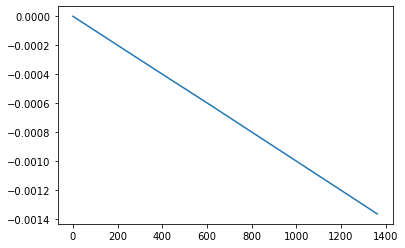

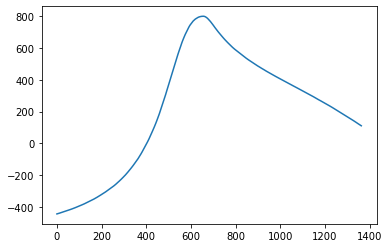

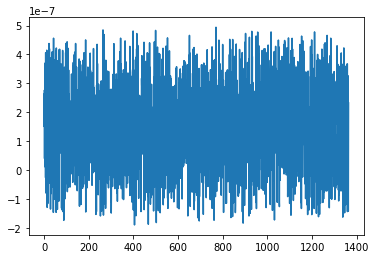

In [4]:
# 获取前后数据包时间差
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt,pi, atan


location_error = []

TDOA = []

ddoa = []

yu = []
print(len(track1),len(time_track1))

for i in range(len(time_track1)):
    
    TDOA.append(time_track1[i]-time_track2[i])
    
    ddoa.append(airplane1.geodistance(track1[i],receiver1.location)-airplane1.geodistance(track1[i],receiver2.location))
    
    yu.append(TDOA[i] - ddoa[i]/300000000 + 1000*time_track1[i]/1000000000)
    
    
# plt.ylim(0.39,0.6)
# plt.xlim(0.39,0.6)

plt.plot(time_track1, TDOA)
plt.show()

plt.plot(time_track1, ddoa)
plt.show()

plt.plot(time_track1, yu)
plt.show()

No handles with labels found to put in legend.


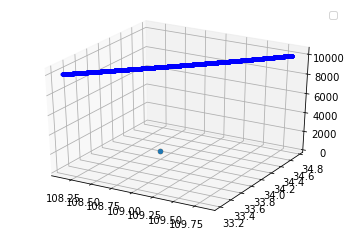

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')


lng = []
lat = []
high = []
for position in track1:
    lng.append(position[0])
    lat.append(position[1])
    high.append(position[2])
ax.plot(lng, lat, high, 'b.')
ax.scatter(receiver1.location[0], receiver1.location[1], receiver1.location[2], 'r.')
ax.scatter(receiver2.location[0], receiver2.location[1], receiver2.location[2], 'r.')
ax.legend()
plt.show()       

In [9]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

# 数据归一化

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))


# train_set_array = np.array(train_set)
# train_norm = sc.fit_transform(train_set_array.reshape(-1,1))


lng = []
lat = []
alt = []

for position in track1:
    lng.append(position[0])
    lat.append(position[1])
    alt.append(position[2])

lng_array = np.array(lng)
lng_norm = sc.fit_transform(lng_array.reshape(-1,1))
# print(lng_norm)

lat_array = np.array(lat)
lat_norm = sc.fit_transform(lat_array.reshape(-1,1))

alt_array = np.array(alt)
alt_norm = sc.fit_transform(alt_array.reshape(-1,1))

tdoa_array = np.array(TDOA)
tdoa_norm = sc.fit_transform(tdoa_array.reshape(-1,1))

track_norm = [] #归一化轨迹列表
for i in range(len(lng_norm)):
    track_norm.append([lng_norm[i][0],lat_norm[i][0], alt_norm[i][0]])
    
    
for i in range(len(lng_norm)):
    


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


track_norm=track_norm[:2000]
train_norm = torch.Tensor(train_norm).cuda()
test_size = 25
train_set = track_norm[: -test_size]
test_set = track_norm[-test_size:]




print(train_set[0])
print(test_set[0])

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=2, hidden_size=100,out_size=2, num_layers = 2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = ( torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred= self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]


torch.manual_seed(42)
model = LSTM().cuda()
# train_data.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)


print(model)


for p in model.parameters():
    print(p.numel())

In [ ]:
epochs = 50

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1, model.hidden_size).cuda(), torch.zeros(1,1, model.hidden_size).cuda())
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    
    
    
    print( f" Epoch {i} Loss:  {loss.item()}")